In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from collections import Counter

For now, I am working with the 2003 Wikipedia graph just to see if I can get things working on this tiny graph first before moving onto a larger, more recent graph

## Setup

In [3]:
# Load data
wiki03_path = 'data/enwiki.wikilink_graph.2002-03-01.csv'
df = pd.read_csv(wiki03_path, sep='\t')
df

,page_id_from,page_title_from,page_id_to,page_title_to
0,12,Anarchism,1023,Anarcho-capitalism
1,12,Anarchism,15247542,Atheism
2,12,Anarchism,39490694,Benjamin Tucker
3,12,Anarchism,5416,Capitalism
4,12,Anarchism,6677,Classical liberalism
...,...,...,...,...
223700,56571945,Monster Energy NASCAR Cup Series,34647,1998
223701,56571945,Monster Energy NASCAR Cup Series,7893,Dale Earnhardt
223702,56571945,Monster Energy NASCAR Cup Series,25480,Richard Petty
223703,56593428,Massachusetts/Dedham,8545,"Dedham, Massachusetts"


In [4]:
# Create graphs

# Undirected
G = nx.from_pandas_edgelist(df, 'page_title_from', 'page_title_to')

# Directed
DG = nx.DiGraph()
DG.add_edges_from(G.edges)

In [5]:
# Get adjacency matrix for directed graph (ordering of nodes is given by DG.nodes())
A = nx.adjacency_matrix(DG)

# To get dense representation, use A.todense()

## Basic descriptive statistics

In [6]:
# Number of vertices
vertices = set(list(df['page_id_from']) + list(df['page_id_to']))
n = len(vertices)

# Number of edges
m = len(df)

print('Number of vertices:', n)
print('Number of edges:', m)

Number of vertices: 27654
Number of edges: 223705


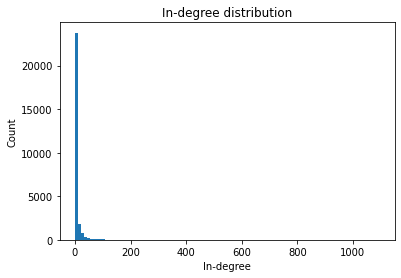

In [28]:
# Plot in-degree distribution
in_degree_sequence = np.sum(A, axis=1)
in_degree_sequence = np.array(in_degree_sequence).flatten()

plt.hist(in_degree_sequence, bins=100)

plt.title('In-degree distribution')
plt.xlabel('In-degree')
plt.ylabel('Count')
plt.show()

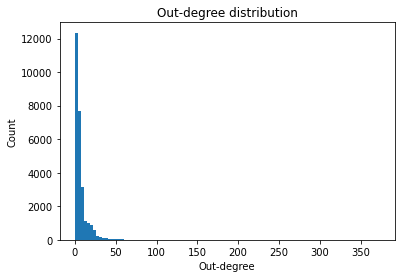

In [30]:
# Plot out-degree distribution
out_degree_sequence = np.sum(A, axis=0)
out_degree_sequence = np.array(out_degree_sequence).flatten()

plt.hist(out_degree_sequence, bins=100)

plt.title('Out-degree distribution')
plt.xlabel('Out-degree')
plt.ylabel('Count')
plt.show()

## Data cleaning

In [31]:
# Goal: Filter out "redirect" pages 

In [37]:
# Count number of pages with in-degree=0 and out-degree=1
is_redirect = (in_degree_sequence == 0) & (out_degree_sequence == 1)
np.sum(is_redirect)

3837

In [ ]:
# TODO